In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import scipy
from scipy import io
import torch

In [2]:
data = io.loadmat('./data/CCN/monkeydata.mat')

In [4]:
monkey = data['trial']

In [8]:
monkey.shape

(100, 8)

In [11]:
monkey_T = monkey.transpose(1,0)

In [13]:
monkey_T.shape[0]

8

In [14]:
target_1 = monkey_T[0]

In [23]:
target_1[0]

(array([[111]], dtype=uint8), array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[-13.47083333, -13.46852386, -13.46541717, ...,  75.65101817,
         75.67271444,  75.69340087],
       [ -8.0225    ,  -8.02420787,  -8.02519673, ...,  45.41279603,
         45.36416882,  45.31664636],
       [-17.89333333, -17.89299333, -17.89293732, ..., -18.11325884,
        -18.11279044, -18.11238267]]))

In [25]:
target_1[0][0]

array([[111]], dtype=uint8)

In [27]:
target_1[0][1]

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [28]:
target_1[0][2]

array([[-13.47083333, -13.46852386, -13.46541717, ...,  75.65101817,
         75.67271444,  75.69340087],
       [ -8.0225    ,  -8.02420787,  -8.02519673, ...,  45.41279603,
         45.36416882,  45.31664636],
       [-17.89333333, -17.89299333, -17.89293732, ..., -18.11325884,
        -18.11279044, -18.11238267]])

In [54]:
for target in range(8):
    temp = monkey_T[target]
    
    spike_list = []
    handpos_list = []
    
    max_time_length = 0
    min_time_length = np.inf
    
#     print(f'Traget: {target+1}')
    for trial in range(100):
        spike = temp[trial][1]
        handpos = temp[trial][2]
        
        spike_list.append(spike)
        handpos_list.append(handpos)
        
        if max_time_length < spike.shape[1]:
            max_time_length = spike.shape[1]
        
        if min_time_length > spike.shape[1]:
            min_time_length = spike.shape[1]
#         print(f'movement time length: {spike.shape}')

In [55]:
max_time_length

742

In [56]:
min_time_length

574

In [73]:
for target in range(8):
    temp = monkey_T[target]

    for trial in range(100):
        spike = temp[trial][1]
        handpos = temp[trial][2]
        
        if max_time_length > spike.shape[1]:
            pad_length =  max_time_length - spike.shape[1]
            pad_spike = spike[:,:pad_length]
            pad_handpos = handpos[:,:pad_length]
            
            padded_spike = np.concatenate((pad_spike, spike), axis=1)
            padded_handpos = np.concatenate((pad_handpos, handpos), axis=1)
            
        monkey_T[target][trial][1] = padded_spike
        monkey_T[target][trial][2] = padded_handpos

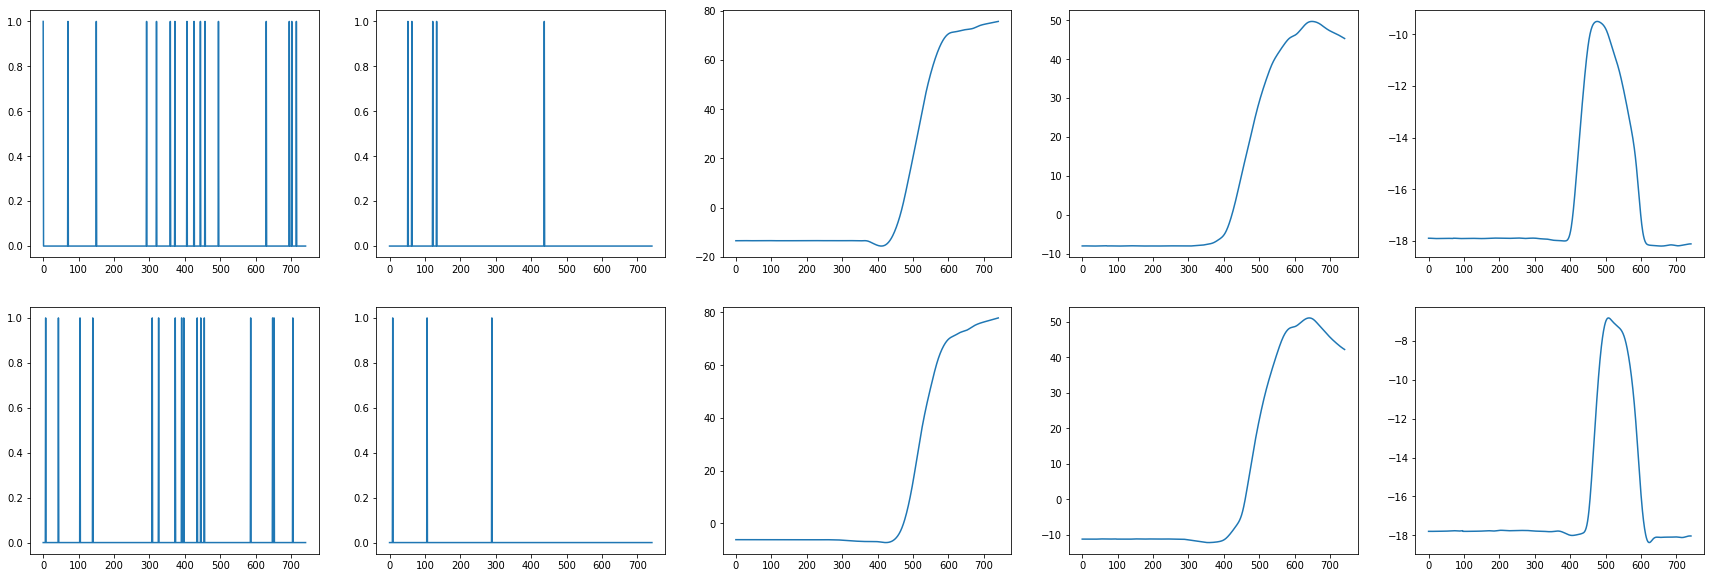

In [84]:
f,ax = plt.subplots(nrows=2, ncols=5, figsize=(30,10))

row = 0
for target in range(1):
    for trial in range(2):
        for neurons in range(2):
            ax[row, neurons].plot(monkey_T[target][trial][1][neurons])
        ax[row, 2].plot(monkey_T[target][trial][2][0])
        ax[row, 3].plot(monkey_T[target][trial][2][1])
        ax[row, 4].plot(monkey_T[target][trial][2][2])
        
        row+=1

In [105]:
total_spike = []
total_handpos = []


for target in range(8):
    temp = monkey_T[target]
    
    spike_list = []
    handpos_list = []
    
    for trial in range(100):
        spike = temp[trial][1]
        handpos = temp[trial][2]
        
        spike_list.append(spike)
        handpos_list.append(handpos)
    
    total_spike.append(np.stack(spike_list))
    total_handpos.append(np.stack(handpos_list))

total_spike = np.stack(total_spike)
total_handpos = np.stack(total_handpos)

In [114]:
total_spike.shape

(8, 100, 98, 742)

In [112]:
total_handpos.shape

(8, 100, 3, 742)

In [108]:
dataset = np.concatenate((total_spike, total_handpos), axis=2)

In [113]:
dataset.shape

(8, 100, 101, 742)

In [95]:
dataset = torch.Tensor(dataset)

In [109]:
torch.save(dataset, './data/CCN/monkeydata_np.pt')

In [110]:
pickle.dump(dataset, open('./data/CCN/monkeydata_np.pickle', 'wb'))

In [103]:
import pickle

In [115]:
pickle.dump(total_spike, open('./data/CCN/monkey_spike.pickle', 'wb'))